In [1]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
protopath = "../image segmentation using HED/deploy.prototxt"
modelpath = "../image segmentation using HED/hed_pretrained_bsds.caffemodel"
net=cv2.dnn.readNetFromCaffe(protopath, modelpath)

In [21]:
img  =cv2.imread("pebbles.jpg")

In [22]:
H,W= img.shape[:2]


In [23]:
H, W

(1600, 2560)

In [24]:
mean_pixel_value = np.average(img, axis=(0, 1))
blob=cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W,H), mean=(105, 117, 123), 
                    swapRB=False, crop=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


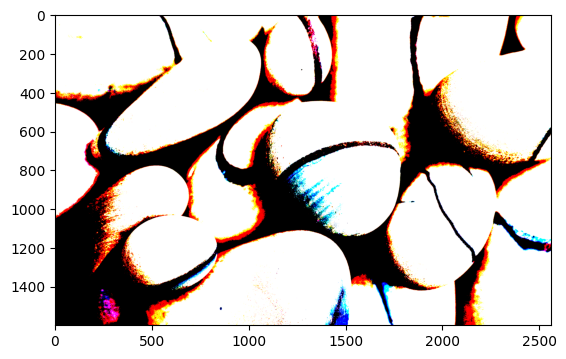

In [25]:
blob_for_plot = np.moveaxis(blob[0, :, :, :], 0, 2)
plt.imshow(blob_for_plot)

In [29]:
net.setInput(blob)
hed=net.forward()
hed=hed[0,0,:,:]
hed=(255*hed).astype("uint8")

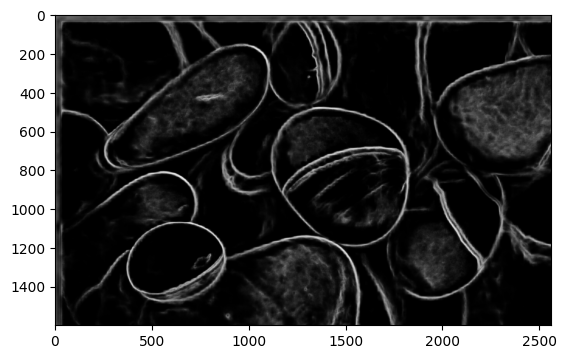

In [30]:
plt.imshow(hed, cmap="gray")

In [31]:
blurr=cv2.GaussianBlur(hed, (3,3), 0)

In [32]:
thresh=cv2.threshold(blurr, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

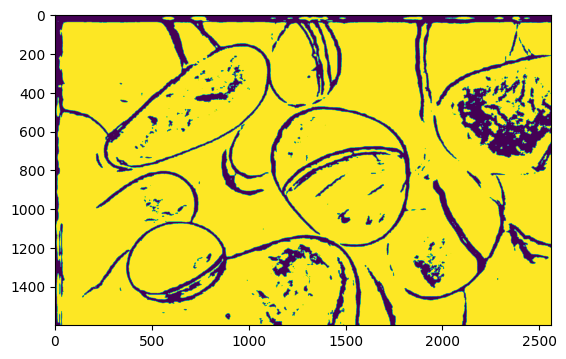

In [34]:
plt.imshow(thresh)